In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np
import matplotlib as mpl
from matplotlib.path import Path
import matplotlib.patches as patches
# mpl.rcParams['figure.dpi']= 2000

In [ ]:
sci = pd.read_csv('data/sci.csv', na_filter=False)
xAx = sci['user_loc'].to_numpy()
yAx = sci['fr_loc'].to_numpy()
data = sci['scaled_sci'].to_numpy()
data.sort()

In [ ]:
counter = np.array(list(range(data.size)))
base = 5000
log_100_data = np.log10(data) / np.log10(base)
log_100_counter = np.log10(counter) / np.log10(base)
plt.scatter(log_100_counter, log_100_data)
# plt.ylim((0,6))
plt.show()

In [ ]:
# 2d heatmap
sciSquare = data.reshape((185,185))
# plt.imshow(sciSquare, origin='lower', norm=colors.LogNorm(vmin=data.min(), vmax=data.max()))
plt.colorbar()
oldTicks = list(range(185))
newTicks = np.unique(xAx)
plt.xticks(oldTicks, newTicks)
plt.yticks(oldTicks, newTicks)
# plt.show()

In [ ]:
# Chord diagram code comes from
# https://github.com/fengwangPhysics/matplotlib-chord-diagram
LW = 0.3
faceTransparency = 0.1
edgeTransparency = 0.1
def polar2xy(r, theta):
    return np.array([r*np.cos(theta), r*np.sin(theta)])

def hex2rgb(c):
    return tuple(int(c[i:i+2], 16)/256.0 for i in (1, 3 ,5))

def IdeogramArc(start=0, end=60, radius=1.0, width=0.2, ax=None, color=(1,0,0)):
    # start, end should be in [0, 360)
    if start > end:
        start, end = end, start
    start *= np.pi/180.
    end *= np.pi/180.
    # optimal distance to the control points
    # https://stackoverflow.com/questions/1734745/how-to-create-circle-with-b%C3%A9zier-curves
    opt = 4./3. * np.tan((end-start)/ 4.) * radius
    inner = radius*(1-width)
    verts = [
        polar2xy(radius, start),
        polar2xy(radius, start) + polar2xy(opt, start+0.5*np.pi),
        polar2xy(radius, end) + polar2xy(opt, end-0.5*np.pi),
        polar2xy(radius, end),
        polar2xy(inner, end),
        polar2xy(inner, end) + polar2xy(opt*(1-width), end-0.5*np.pi),
        polar2xy(inner, start) + polar2xy(opt*(1-width), start+0.5*np.pi),
        polar2xy(inner, start),
        polar2xy(radius, start),
        ]

    codes = [Path.MOVETO,
             Path.CURVE4,
             Path.CURVE4,
             Path.CURVE4,
             Path.LINETO,
             Path.CURVE4,
             Path.CURVE4,
             Path.CURVE4,
             Path.CLOSEPOLY,
             ]

    if ax == None:
        return verts, codes
    else:
        path = Path(verts, codes)
        patch = patches.PathPatch(path, facecolor=color+(faceTransparency,), edgecolor=color+(edgeTransparency,), lw=LW)
        ax.add_patch(patch)


def ChordArc(start1=0, end1=60, start2=180, end2=240, radius=1.0, chordwidth=0.7, ax=None, color=(1,0,0)):
    # start, end should be in [0, 360)
    if start1 > end1:
        start1, end1 = end1, start1
    if start2 > end2:
        start2, end2 = end2, start2
    start1 *= np.pi/180.
    end1 *= np.pi/180.
    start2 *= np.pi/180.
    end2 *= np.pi/180.
    opt1 = 4./3. * np.tan((end1-start1)/ 4.) * radius
    opt2 = 4./3. * np.tan((end2-start2)/ 4.) * radius
    rchord = radius * (1-chordwidth)
    verts = [
        polar2xy(radius, start1),
        polar2xy(radius, start1) + polar2xy(opt1, start1+0.5*np.pi),
        polar2xy(radius, end1) + polar2xy(opt1, end1-0.5*np.pi),
        polar2xy(radius, end1),
        polar2xy(rchord, end1),
        polar2xy(rchord, start2),
        polar2xy(radius, start2),
        polar2xy(radius, start2) + polar2xy(opt2, start2+0.5*np.pi),
        polar2xy(radius, end2) + polar2xy(opt2, end2-0.5*np.pi),
        polar2xy(radius, end2),
        polar2xy(rchord, end2),
        polar2xy(rchord, start1),
        polar2xy(radius, start1),
        ]

    codes = [Path.MOVETO,
             Path.CURVE4,
             Path.CURVE4,
             Path.CURVE4,
             Path.CURVE4,
             Path.CURVE4,
             Path.CURVE4,
             Path.CURVE4,
             Path.CURVE4,
             Path.CURVE4,
             Path.CURVE4,
             Path.CURVE4,
             Path.CURVE4,
             ]

    if ax == None:
        return verts, codes
    else:
        path = Path(verts, codes)
        patch = patches.PathPatch(path, facecolor=color+(faceTransparency,), edgecolor=color+(edgeTransparency,), lw=LW)
        ax.add_patch(patch)

def selfChordArc(start=0, end=60, radius=1.0, chordwidth=0.7, ax=None, color=(1,0,0)):
    # start, end should be in [0, 360)
    if start > end:
        start, end = end, start
    start *= np.pi/180.
    end *= np.pi/180.
    opt = 4./3. * np.tan((end-start)/ 4.) * radius
    rchord = radius * (1-chordwidth)
    verts = [
        polar2xy(radius, start),
        polar2xy(radius, start) + polar2xy(opt, start+0.5*np.pi),
        polar2xy(radius, end) + polar2xy(opt, end-0.5*np.pi),
        polar2xy(radius, end),
        polar2xy(rchord, end),
        polar2xy(rchord, start),
        polar2xy(radius, start),
        ]

    codes = [Path.MOVETO,
             Path.CURVE4,
             Path.CURVE4,
             Path.CURVE4,
             Path.CURVE4,
             Path.CURVE4,
             Path.CURVE4,
             ]

    if ax == None:
        return verts, codes
    else:
        path = Path(verts, codes)
        patch = patches.PathPatch(path, facecolor=color+(faceTransparency,), edgecolor=color+(edgeTransparency,), lw=LW)
        ax.add_patch(patch)

def chordDiagram(X, ax, colors=None, width=0.1, pad=2, chordwidth=0.7):
    """Plot a chord diagram
    Parameters
    ----------
    X :
        flux data, X[i, j] is the flux from i to j
    ax :
        matplotlib `axes` to show the plot
    colors : optional
        user defined colors in rgb format. Use function hex2rgb() to convert hex color to rgb color. Default: d3.js category10
    width : optional
        width/thickness of the ideogram arc
    pad : optional
        gap pad between two neighboring ideogram arcs, unit: degree, default: 2 degree
    chordwidth : optional
        position of the control points for the chords, controlling the shape of the chords
    """
    # X[i, j]:  i -> j
    x = X.sum(axis = 1) # sum over rows
    ax.set_xlim(-1.1, 1.1)
    ax.set_ylim(-1.1, 1.1)

    if colors is None:
    # use d3.js category10 https://github.com/d3/d3-3.x-api-reference/blob/master/Ordinal-Scales.md#category10
        colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
                  '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
        if len(x) > 10:
            print('x is too large! Use x smaller than 10')
    colors = [hex2rgb(colors[i]) for i in range(len(x))]

    # find position for each start and end
    y = x/np.sum(x).astype(float) * (360 - pad*len(x))

    pos = {}
    arc = []
    nodePos = []
    start = 0
    for i in range(len(x)):
        end = start + y[i]
        arc.append((start, end))
        angle = 0.5*(start+end)
        #print(start, end, angle)
        if -30 <= angle <= 210:
            angle -= 90
        else:
            angle -= 270
        nodePos.append(tuple(polar2xy(1.1, 0.5*(start+end)*np.pi/180.)) + (angle,))
        z = (X[i, :]/x[i].astype(float)) * (end - start)
        ids = np.argsort(z)
        z0 = start
        for j in ids:
            pos[(i, j)] = (z0, z0+z[j])
            z0 += z[j]
        start = end + pad

    for i in range(len(x)):
        start, end = arc[i]
        IdeogramArc(start=start, end=end, radius=1.0, ax=ax, color=colors[i], width=width)
        start, end = pos[(i,i)]
        selfChordArc(start, end, radius=1.-width, color=colors[i], chordwidth=chordwidth*0.7, ax=ax)
        for j in range(i):
            color = colors[i]
            if X[i, j] > X[j, i]:
                color = colors[j]
            start1, end1 = pos[(i,j)]
            start2, end2 = pos[(j,i)]
            ChordArc(start1, end1, start2, end2,
                     radius=1.-width, color=colors[i], chordwidth=chordwidth, ax=ax)

    #print(nodePos)
    return nodePos

In [ ]:
# 185 somewhat unique colors
customColors = ["#c2ffef",
"#571fcc",
"#5bdc06",
"#2e36dd",
"#9dff4a",
"#7700be",
"#01e141",
"#ae27de",
"#78ff5e",
"#c24dff",
"#67cb00",
"#8053ff",
"#c4dc00",
"#0130c4",
"#fcff53",
"#001294",
"#89c800",
"#e739ed",
"#00de65",
"#eb00cb",
"#7fff8a",
"#ff1ac8",
"#02e78a",
"#da63ff",
"#59a900",
"#8063ff",
"#ffde29",
"#0056dc",
"#ceca00",
"#000c79",
"#d2ff79",
"#b666ff",
"#018e12",
"#9f0096",
"#47ffa7",
"#d00095",
"#01fec0",
"#ff2192",
"#00c467",
"#ff4ec1",
"#01a447",
"#51007c",
"#baff8b",
"#001171",
"#ebff7d",
"#013fb4",
"#c4bc00",
"#857dff",
"#9aae00",
"#6f0081",
"#90ff9e",
"#1c004d",
"#fff26c",
"#0051bb",
"#ffd24d",
"#013a92",
"#e48f00",
"#3c90ff",
"#e78000",
"#888eff",
"#659800",
"#ff82f9",
"#00d68c",
"#ef0046",
"#00f1ca",
"#e20011",
"#3dfff1",
"#cf2c00",
"#00f0ff",
"#ff3f42",
"#5affe0",
"#dd0067",
"#7bffbb",
"#ff3c90",
"#00a865",
"#ff73d5",
"#3c6e00",
"#cb88ff",
"#738c00",
"#ee98ff",
"#135300",
"#ff6bb3",
"#01cfa5",
"#ff416c",
"#01d0be",
"#bd001f",
"#44d4ff",
"#ff6124",
"#01a5f4",
"#df6700",
"#007ad1",
"#b1a000",
"#002671",
"#e7ff9a",
"#410056",
"#baffa5",
"#5f0065",
"#ffe278",
"#000d47",
"#ffb850",
"#004b9b",
"#c98e00",
"#6aacff",
"#b44b00",
"#49bfff",
"#ac0016",
"#77edff",
"#92000f",
"#a8ffcf",
"#a2006d",
"#008144",
"#7b0064",
"#d8ffc4",
"#540043",
"#ffd276",
"#001335",
"#ff9e45",
"#00427c",
"#ff8c52",
"#02b7ec",
"#821800",
"#9ff9ff",
"#96002a",
"#02c0cd",
"#a60041",
"#01a092",
"#ff7254",
"#027eb6",
"#af6400",
"#a7abff",
"#757c00",
"#ff92dd",
"#004c18",
"#ff7ea3",
"#008772",
"#ff7a77",
"#019998",
"#700014",
"#f9ffda",
"#22001e",
"#ffc87b",
"#18000e",
"#f4fbff",
"#2c0b00",
"#fff3e9",
"#43001e",
"#ffebbf",
"#76004b",
"#586900",
"#ffbbf3",
"#091f00",
"#ffcefd",
"#404e00",
"#94c0ff",
"#8d3b00",
"#b2dcff",
"#6e1500",
"#b6d1ff",
"#9c6700",
"#014e78",
"#ffa57e",
"#002219",
"#f6e8ff",
"#1b1200",
"#d4cdff",
"#895100",
"#0198b4",
"#5e0018",
"#008083",
"#740037",
"#005f44",
"#ff9daa",
"#00292c",
"#ffd3a6",
"#00334b",
"#ffac99",
"#004434",
"#ffc0ce",
"#2e2500",
"#006e8e",
"#634c00",
"#00656a",
"#4e3500",
"#006e65",
"#401f00"]

In [ ]:
fig = plt.figure(figsize=(6,6))

# Ideas to make much smaller chord diagrams
# split countries by continent
# make one chord diagram per continent

# Split countries by language
# One chord diagram per continent
data = sciSquare

ax = plt.axes([0,0,1,1])

# nodePos = chordDiagram(data, ax, colors=customColors)
ax.axis('off')
prop = dict(fontsize=4*0.8, ha='center', va='center')
nodes = newTicks
# for i in range(newTicks.size):
    # ax.text(nodePos[i][0], nodePos[i][1], nodes[i], rotation=nodePos[i][2], **prop)

# plt.show()


Index(['Country', 'Alpha-2 code', 'Alpha-3 code', 'Numeric',
       'GDP per capita (2019, $)', 'Population (2019)',
       'Literacy Rate Age 15+ (2018)', 'Internet Rate (2017)',
       'Human Capital Index (2018)', 'Lat', 'Long', 'Primary Language spoken'],
      dtype='object')


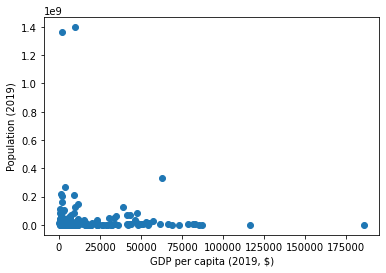

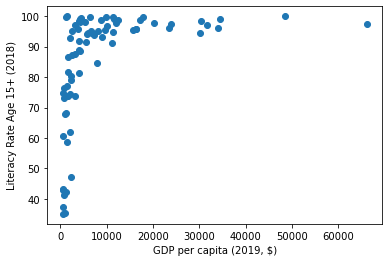

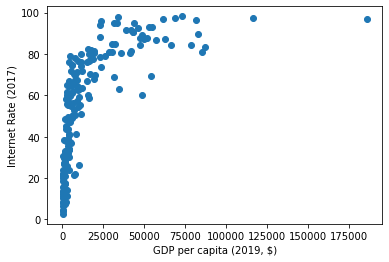

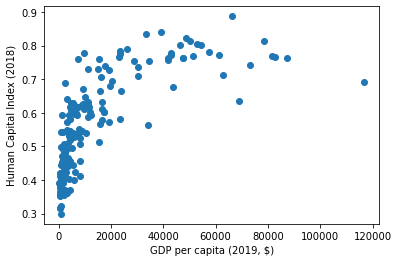

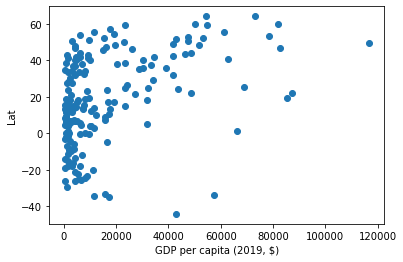

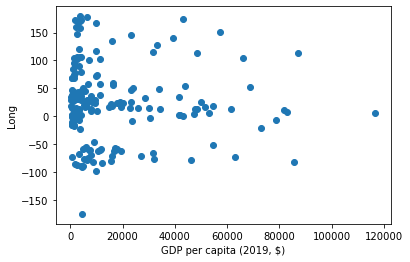

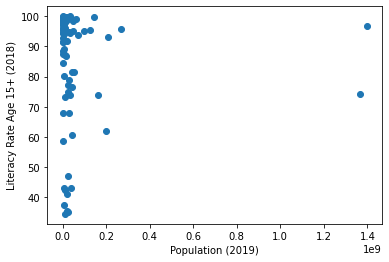

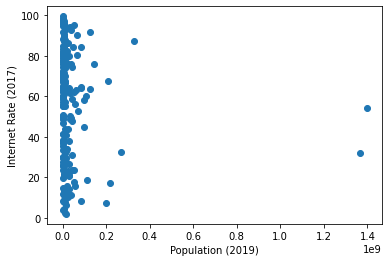

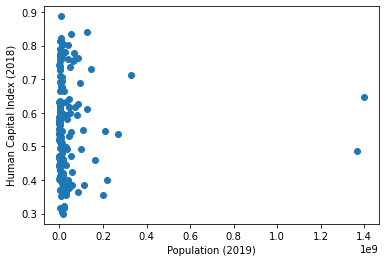

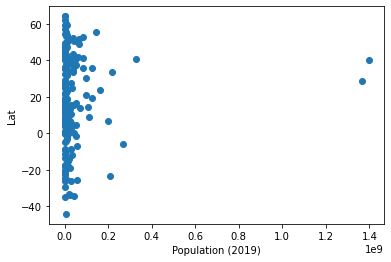

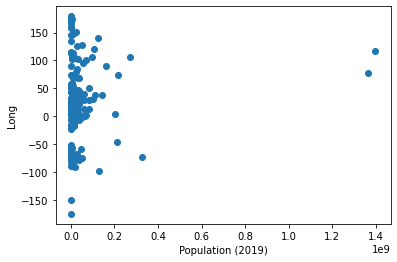

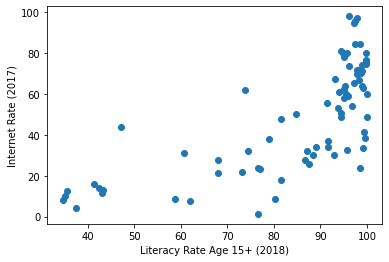

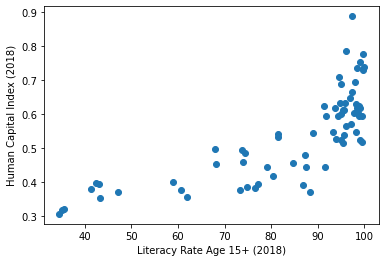

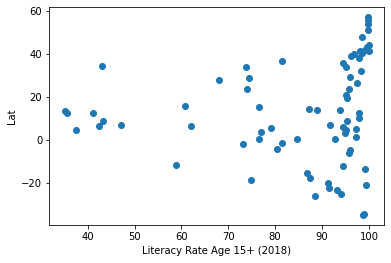

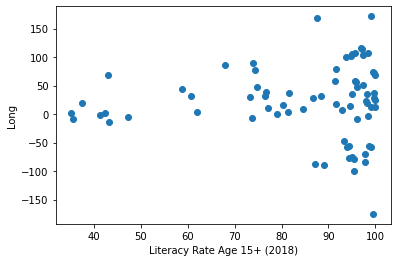

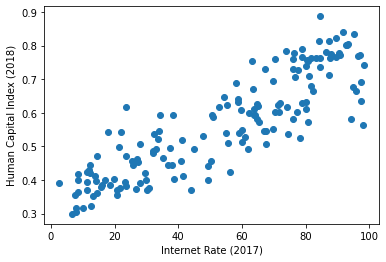

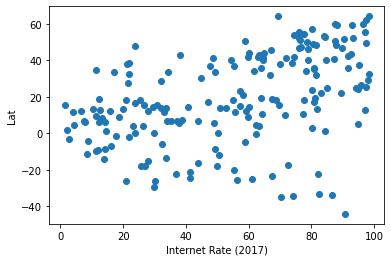

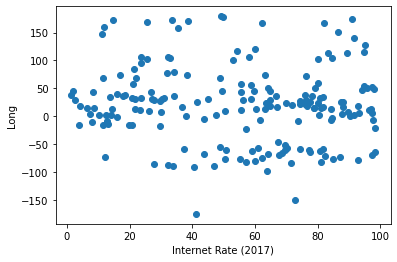

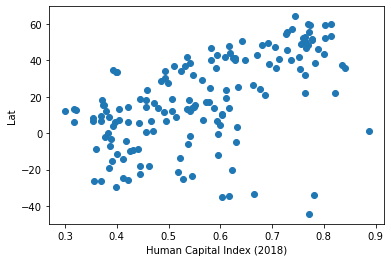

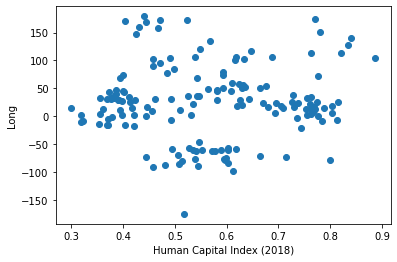

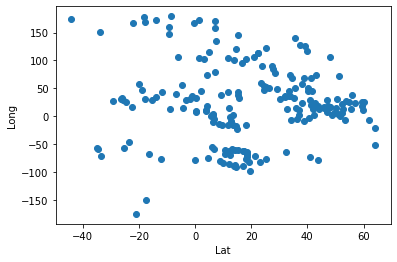

In [2]:
country_info = pd.read_excel('master_data/Country-data-master.xlsx', na_values=['..'])
cols = country_info.columns
print(cols)
for i in range(4, len(cols)-1):
    for j in range(i+1, len(cols)-1):
        xVals = country_info[cols[i]]
        yVals = country_info[cols[j]]
        plt.scatter(xVals, yVals)
        plt.ylabel(cols[j])
        plt.xlabel(cols[i])
        plt.show()
        plt.close()
        # print(combo)

                                               Country Alpha-2 code  \
0                                       American Samoa           AS   
1               Congo (the Democratic Republic of the)           CD   
2                                              Curaçao           CW   
3                                                 Guam           GU   
4                                          Isle of Man           IM   
..                                                 ...          ...   
149  United Kingdom of Great Britain and Northern I...           GB   
150                     United States of America (the)           US   
151                                              Yemen           YE   
152                                           Zimbabwe           ZW   
153                                            Namibia          NaN   

    Alpha-3 code  Numeric  GDP per capita (2019, $)  Population (2019)  \
0            ASM       16              11466.690706            55312.0   

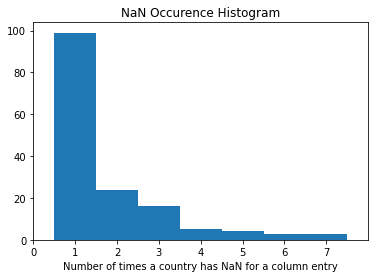

In [46]:
country_info_with_nan = country_info
storage = pd.DataFrame()
for i in cols:
    storage = pd.concat([country_info_with_nan[country_info_with_nan[i].isnull()], storage])
    storage = storage.drop_duplicates().reset_index(drop=True)
storage['nan_count'] = storage.isnull().sum(axis=1)
print(storage)
nan_count = storage['nan_count'].to_numpy()
bins = np.arange(np.max(nan_count) + 1) + 0.5
plt.close()
plt.hist(nan_count, bins)
plt.xticks(range(np.max(nan_count)+1))
plt.xlim(0, np.max(nan_count)+1)
plt.xlabel("Number of times a country has NaN for a column entry")
plt.title("NaN Occurence Histogram")
plt.show()

In [48]:
for i in range(1, np.max(nan_count)+1):
    print("Countries with %d NaN values" % i)
    print(storage[storage['nan_count'] == i][['Country', 'Population (2019)']])

Countries with 1 NaN values


KeyError: "['Population'] not in index"